Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
# Creating new dataframe df from dictionary data

import pandas as pd
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data , columns = ("animal","age","visits","priority"), index = ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'))
df 

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [2]:
df.describe() # Gives summary statistics


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**3.** Return the first 3 rows of the DataFrame `df`.

In [3]:
df.head(3) # Gives first 3 rows

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [4]:
df[["animal","age"]] # displays animal and age columns from dataframe

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [5]:
df_1 = df[["animal","age"]] # Selects the respective columns
df_1.loc[["c","d","h"]] # Rows  [3,4,8] are indexed as ["c","d","h"]

,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


**6.** Select only the rows where the number of visits is greater than 3.

In [6]:
df1 = df[df["visits"]>3] # df of rows with visits > 3
df1

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [7]:
df2 = df.loc[df["age"].isnull()] # retrives rows that has null values
df2 

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [8]:
df3 = df[df["animal"] == "cat"]
df3[df3["age"] < 3]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [9]:
df_newdf = df.dropna()
df_newdf # Data frame with NaN values dropped

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
i,dog,7.0,2,no
j,dog,3.0,1,no


In [11]:
df_newdf.loc[(df_newdf["age"] >= 2) & (df_newdf["age"] <= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [12]:
df.loc[["f"],["age"]] = 1.5
df.loc["f"]

animal      cat
age         1.5
visits        3
priority     no
Name: f, dtype: object

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [13]:
df["visits"].sum()

np.int64(19)

**12.** Calculate the mean age for each different animal in `df`.

In [14]:
g = df.groupby("animal")["age"].mean()
g # Grouped animals with their mean age

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [19]:
data_add = {'animal': 'cat',
        'age': 3,
        'visits': 2,
        'priority':'yes'}
df_newdata = pd.DataFrame(data_add, columns = ("animal","age","visits","priority"),index=["k"])

In [20]:
df_update = pd.concat([df, df_newdata], axis = 0)
df_update # Updated data

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [21]:
df = df_update.drop(index =["k"])
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [22]:
gby = df["animal"].value_counts()
gby

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [23]:
df_sorted = df.sort_values(by=["age","visits"],ascending= [False,True])
df_sorted

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [24]:
df1 = df.replace(to_replace = 'yes', value = True) 
df1.replace(to_replace = 'no', value = False)

C:\Users\Nidheesh\AppData\Local\Temp\ipykernel_8168\3418805682.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace(to_replace = 'no', value = False)


,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [25]:
df1.replace(to_replace = 'snake', value = 'python')

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,no
d,dog,NaN,3,True
e,dog,5.0,2,no
f,cat,1.5,3,no
g,python,4.5,1,no
h,cat,NaN,1,True
i,dog,7.0,2,no
j,dog,3.0,1,no


**18.** Load the ny-flights dataset to Python

In [27]:
file = pd.read_csv("ny-flights .csv")
file

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [28]:
max_id = file["airline_id"].value_counts()
max_id.head(1)

airline_id
20409    4902
Name: count, dtype: int64

**20.** Draw a plot between dep_delay and arr_delay

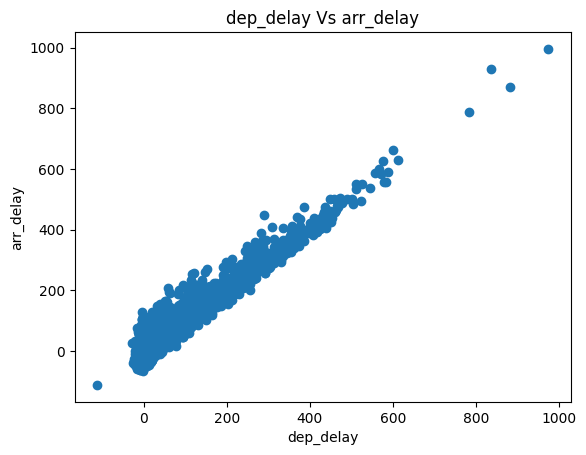

In [29]:
import matplotlib.pyplot as plt
file.dropna()
x = np.array(file["dep_delay"])
y = np.array(file["arr_delay"])
plt.scatter(x,y)
plt.xlabel("dep_delay")
plt.ylabel("arr_delay")
plt.title('dep_delay Vs arr_delay')
plt.show()

**ny_flights Dataset Tasks:**

1. Which airline (carrier) experienced the highest average arrival delay?

In [40]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ny-flights .csv")
df.columns = df.columns.str.strip().str.lower()

# Calculate average arrival delay for each carrier
avg_delay = df.groupby('unique_carrier')['arr_delay'].mean().reset_index()
worst_carrier = avg_delay.sort_values('arr_delay', ascending=False).iloc[0]
print("Carrier:", worst_carrier['unique_carrier'], "with an average delay of", worst_carrier['arr_delay'])


Carrier: HA with an average delay of 44.0


2. How many total flights are recorded in the dataset?

In [71]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ny-flights .csv")
df.columns = df.columns.str.strip().str.lower()

# Total number of flights (rows)
total_flights = len(df)
print("Total number of flights:", total_flights)


Total number of flights: 20817


In [ ]:
3. Which airline (carrier) operated the most flights?

In [75]:
# Count flights by carrier
carrier_counts = df['unique_carrier'].value_counts().reset_index()
carrier_counts.columns = ['unique_carrier', 'num_flights']
top_carrier = carrier_counts.iloc[0]
print("Airline with the most flights")
print(f"Carrier: {top_carrier['unique_carrier']} with {top_carrier['num_flights']} flights")


Airline with the most flights
Carrier: B6 with 4902 flights


4. What is the average departure delay of the flights?

In [76]:
# Calculate the average departure delay
if 'dep_delay' in df.columns:
    avg_dep_delay = df['dep_delay'].mean()
    print("Average departure delay:", round(avg_dep_delay, 2), "minutes")
else:
    print("Column 'dep_delay' not found in the dataset.")


Average departure delay: 22.77 minutes


**Diabetes Dataset EDA:**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
# Load the dataset
file_path = "diabetes_model.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

In [59]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB
None


In [60]:
# Check for missing values
print("Missing Values:\n", df.isna().sum())

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (or impute them if preferred)
df.dropna(inplace=True)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


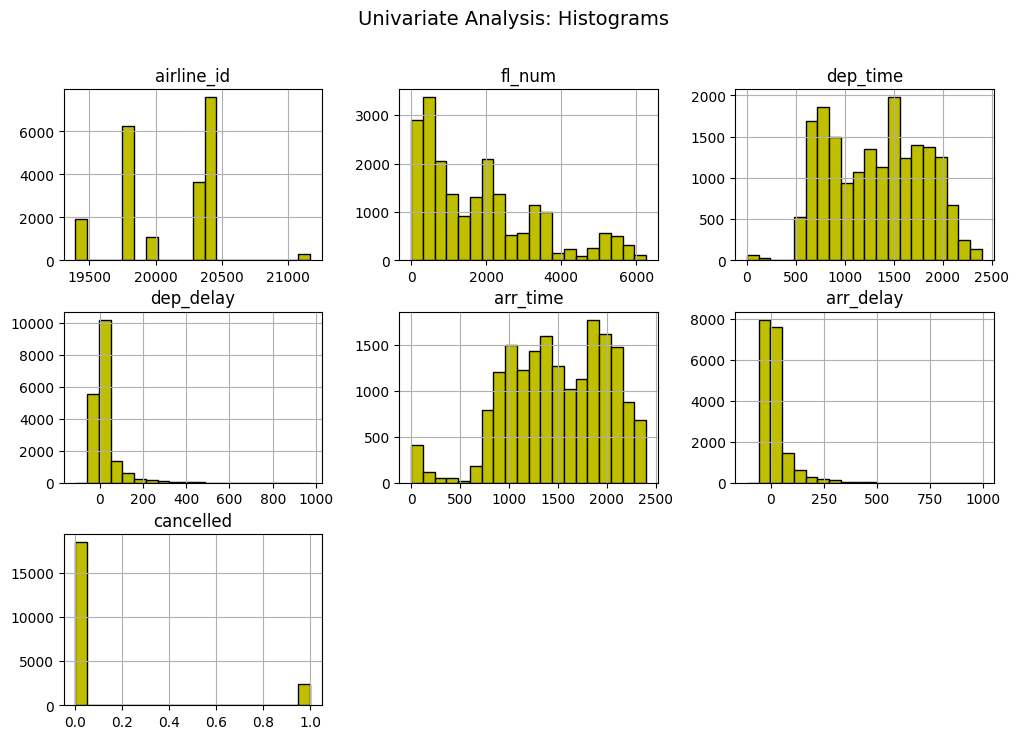

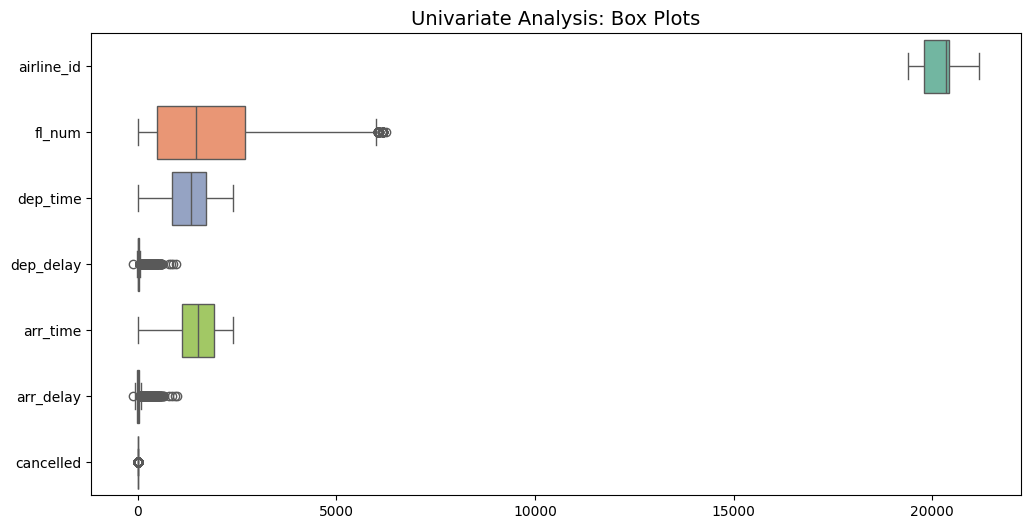

In [72]:
# ----------------- Univariate Analysis -----------------
# Histograms
df.hist(figsize=(12, 8), bins=20, color= "y",edgecolor="black")
plt.suptitle("Univariate Analysis: Histograms", fontsize=14)
plt.show()

# Box plots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Univariate Analysis: Box Plots", fontsize=14)
plt.show()


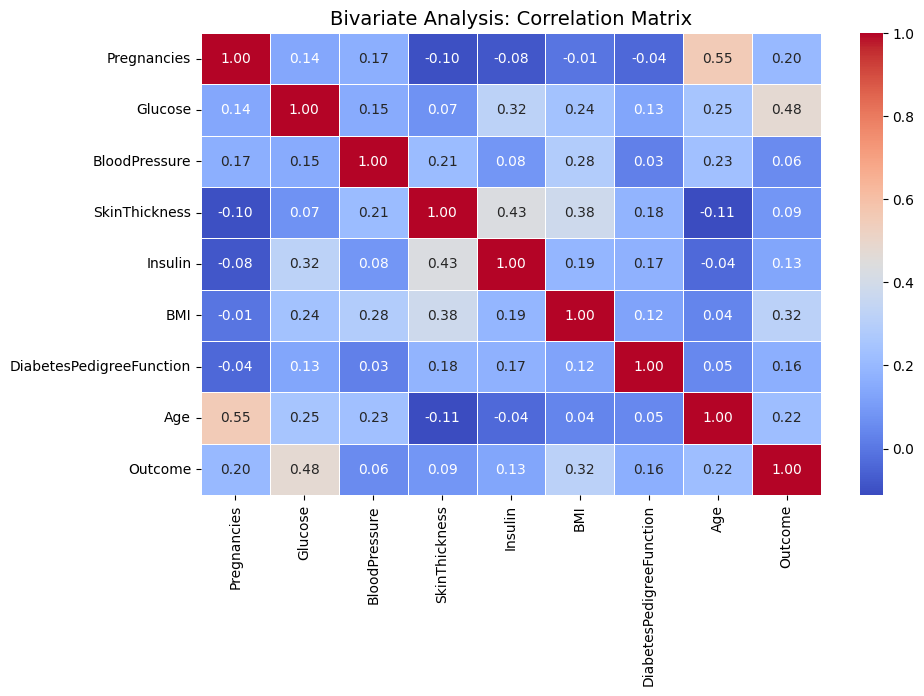

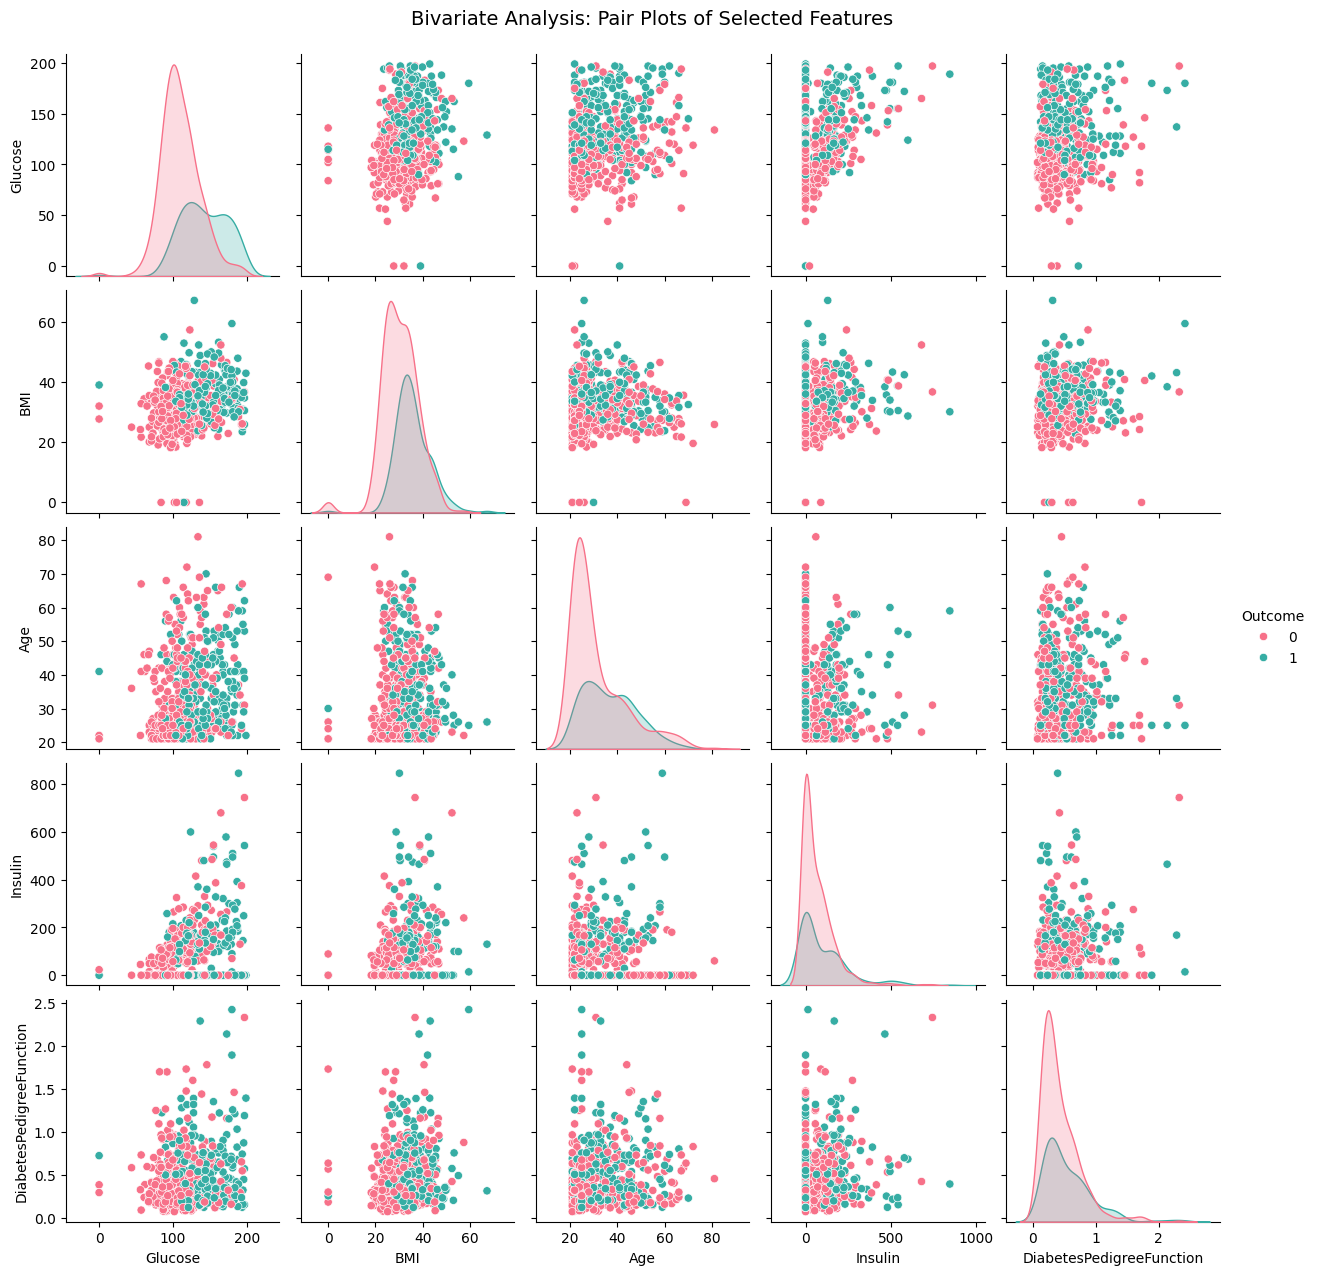

In [62]:
# ----------------- Bivariate Analysis -----------------
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Bivariate Analysis: Correlation Matrix", fontsize=14)
plt.show()

# Pair plot (scatter plots)
selected_features = ["Glucose", "BMI", "Age", "Insulin", "DiabetesPedigreeFunction", "Outcome"]
sns.pairplot(df[selected_features], hue="Outcome", palette="husl")
plt.suptitle("Bivariate Analysis: Pair Plots of Selected Features", y=1.02, fontsize=14)
plt.show()


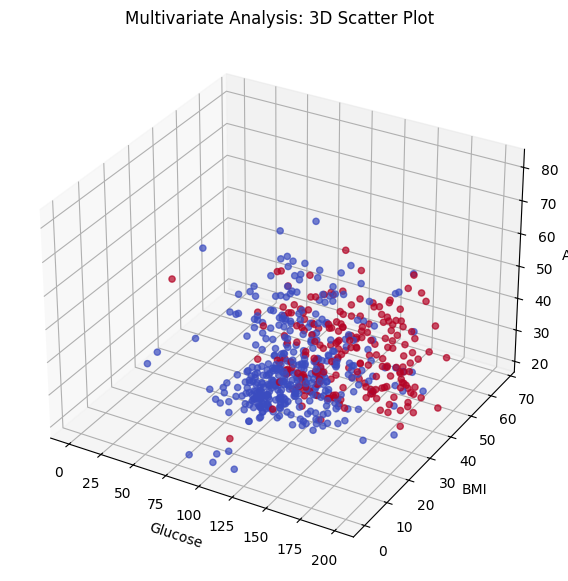

In [63]:

# ----------------- Multivariate Analysis -----------------
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["Glucose"], df["BMI"], df["Age"], c=df["Outcome"], cmap="coolwarm", alpha=0.7)
ax.set_xlabel("Glucose")
ax.set_ylabel("BMI")
ax.set_zlabel("Age")
ax.set_title("Multivariate Analysis: 3D Scatter Plot")
plt.show()